Project HRV fatigue.

In [2]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend
import seaborn as sns
from scipy import fftpack

sns.set_style("dark")

In [3]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w = wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0], columns=w[1]['sig_name']))

In [4]:
############
### data ###
############

w = wfdb.rdsamp('Data/s9_walk') # acces to a specific file from Physionet
freq = w[1]['fs'] # header acces to frequency sampling
df = pd.DataFrame(data=w[0], columns=w[1]['sig_name']) # convert the data into Pandas DataFrame
data = df.chest_ecg.values
t = np.linspace(0, np.shape(data)[0] / freq, np.shape(data)[0])
 
#######################
### removing trends ###
#######################

no_trend_data = detrend(data) # remove linear trend

############
### plot ###
############

#plt.figure(figsize=(20, 7))
#plt.subplot(1, 3, 1)
#plt.plot(t, data)
#plt.title("Raw data")
#plt.subplot(1, 2, 2)
#plt.plot(t, no_trend_data)
#plt.title("No trend data")

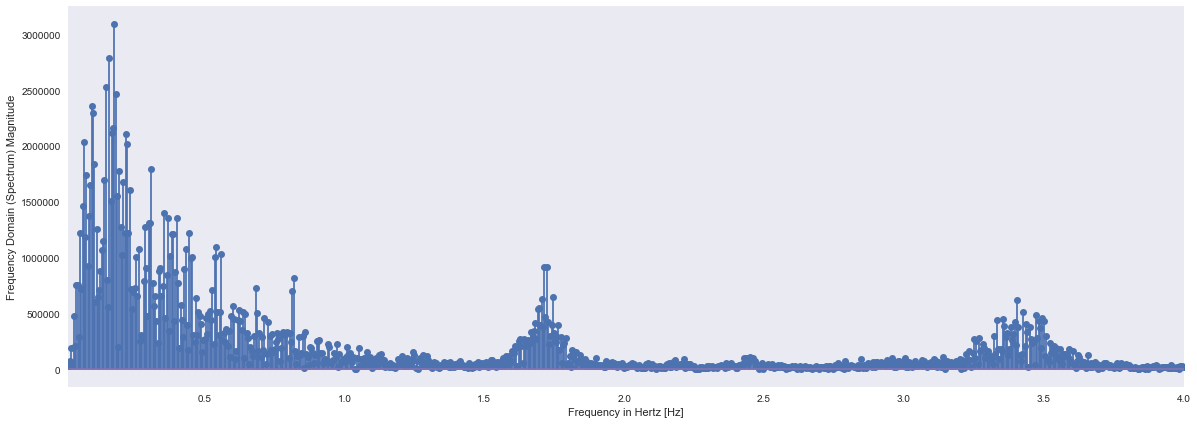

In [11]:
#########################
### fourier transform ###
#########################

windows_freq_min = 0.01 # in Hz
windows_freq_max = 4 # in Hz

f_s = 256
x = data
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s
df_temp = pd.DataFrame(data={'freqs': freqs, 'abs(X)': np.abs(X)})
df_temp = df_temp[(windows_freq_min <= df_temp.freqs) & (df_temp.freqs <= windows_freq_max)]

fig, ax = plt.subplots(figsize=(20, 7))
ax.stem((df_temp.freqs), (df_temp['abs(X)']))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim((windows_freq_min), (windows_freq_max))
plt.show()
#ax.set_ylim(-5, 110)

In [6]:
# filter fear
# filter l

In [7]:
read('Data/s9_walk')

,chest_ecg,wrist_ppg,wrist_gyro_x,wrist_gyro_y,wrist_gyro_z,wrist_low_noise_accelerometer_x,wrist_low_noise_accelerometer_y,wrist_low_noise_accelerometer_z,wrist_wide_range_accelerometer_x,wrist_wide_range_accelerometer_y,wrist_wide_range_accelerometer_z,wrist_mag_x,wrist_mag_y,wrist_mag_z,sample_times_for_all_signals_apart_from_ecg
0,51.640705,1799.269923,-15.620321,-146.291367,116.383664,3.791152,-9.329793,1.622757,3.672590,-9.427104,1.577932,-0.223171,0.096038,-0.893620,12.997271
1,38.143134,1793.418372,-15.787074,-143.192481,117.360723,3.791152,-9.329285,1.646969,3.711056,-9.388949,1.578823,-0.223171,0.096038,-0.893620,13.000933
2,42.992261,1844.687803,-15.599902,-140.243300,118.436004,3.791366,-9.304383,1.695834,3.749310,-9.349909,1.618897,-0.230151,0.080091,-0.893620,13.004595
3,43.292207,1825.629247,-15.644143,-137.526161,119.263143,3.767274,-9.267029,1.732482,3.748673,-9.348519,1.696931,-0.196949,0.090713,-0.897801,13.009173
4,23.295807,1820.515976,-15.661158,-134.449731,119.847310,3.780279,-9.194481,1.770231,3.709675,-9.190972,1.775633,-0.209180,0.069455,-0.906163,13.012835
5,4.999100,1854.941690,-15.477390,-131.126288,119.852480,3.793284,-9.122442,1.783877,3.710312,-9.192488,1.697599,-0.209180,0.071230,-0.883160,13.017412
6,6.598812,1839.574532,-15.606708,-128.064828,119.893837,3.806183,-9.062854,1.772982,3.787139,-9.037593,1.739120,-0.202184,0.073005,-0.895702,13.021074
7,9.048371,1831.508142,-16.015083,-121.642499,119.599168,3.831234,-9.014828,1.798405,3.825606,-9.038351,1.739788,-0.202184,0.073005,-0.895702,13.024736
8,9.048371,1850.539354,-16.028695,-117.555563,119.252804,3.892743,-8.979507,1.836263,3.863434,-9.076253,1.818268,-0.195204,0.064145,-0.885258,13.029314
9,-8.498470,1849.090138,-16.671885,-113.775521,118.947796,3.929840,-8.956764,1.812932,3.824968,-9.036835,1.817934,-0.184719,0.067694,-0.876896,13.032976


In [8]:
def fourier_plot(df):
    

IndentationError: expected an indented block (<ipython-input-8-22326e53b34a>, line 2)